In [30]:
#  add karna-python-backend to the path
import sys
sys.path.append('C:/Users/Prince/Documents/GitHub/Proejct-Karna/offline-ai-assistant/karna-python-backend')
sys.path.append('C:/Users/Prince/Documents/GitHub/Proejct-Karna/offline-ai-assistant/karna-python-backend/inference')

from importlib import reload  # Not needed in Python 2
import logging
reload(logging)
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.INFO, datefmt='%I:%M:%S')

logger = logging.getLogger(__name__)

from clustering import *
from config.paths import workspace_dir, backend_inference_dir
from omniparser.omni_helper import OmniParserResultModel


In [31]:
# get omniparser result from image path
import os
from omniparser.omni_helper import get_omniparser_inference_data_from_image_path
# get current directory
omniparser_dir = os.path.join(backend_inference_dir, "omniparser")
image_names = ["cluster_test.png", "test.png", "youtube_test.png"]
image_path = os.path.join(omniparser_dir, image_names[1])
omniparser_result_model : OmniParserResultModel = get_omniparser_inference_data_from_image_path(image_path)


c:\Users\Prince\Documents\GitHub\Proejct-Karna\offline-ai-assistant\venv\lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Omniparser initialized!!!
image size: (1882, 898)

0: 640x1280 64 icons, 62.5ms
Speed: 15.6ms preprocess, 62.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 1280)
len(filtered_boxes): 116 97


c:\Users\Prince\Documents\GitHub\Proejct-Karna\offline-ai-assistant\venv\lib\site-packages\transformers\generation\configuration_utils.py:649: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
04:08:06 INFO:Getting omniparser result model for event_id: -1
04:08:06 INFO:Converting parsed content df to bounding boxes for event_id: -1
04:08:06 INFO:Creating omniparser result model for event_id: -1
04:08:06 INFO:Created omniparser result model for event_id: -1


time to get parsed content: 0.2907736301422119


In [32]:

# create cluster preprocessor
parsed_content_results : List[ParsedContentResult] = omniparser_result_model.parsed_content_results



In [33]:

cluster_model_heirarchy = ClusterModelHeirarchy(os.path.join(omniparser_dir, "sample_cluster_rules.json"))


In [34]:

cluster_preprocessor = ClusterPreprocessor(parsed_content_results, 
                                            cluster_model_heirarchy, 
                                            omniparser_result_model.omniparser_result)


In [35]:

# create cluster worker
cluster_worker = ClusterDBSCANWorker(cluster_preprocessor)
# cluster
cluster_results = cluster_worker.cluster()

# print the cluster results
for cluster_result in cluster_results:
    print(cluster_result)

ClusterResult(cluster_result_id='v0_h0', parsed_content_results=[ParsedContentResult(type='icon', bbox=[0.0, 133.0, 262.0, 177.0], interactivity=True, content='Scheduled sessions ', source='box_yolo_content_ocr', id=52), ParsedContentResult(type='icon', bbox=[0.0, 176.0, 263.0, 222.0], interactivity=True, content='Session history ', source='box_yolo_content_ocr', id=53), ParsedContentResult(type='icon', bbox=[0.0, 220.0, 262.0, 266.0], interactivity=True, content='Freelance jobs ', source='box_yolo_content_ocr', id=55), ParsedContentResult(type='icon', bbox=[0.0, 264.0, 260.0, 310.0], interactivity=True, content='Code reviews ', source='box_yolo_content_ocr', id=57)], cluster_bbox_xyxy=[0.0, 133.0, 263.0, 310.0])
ClusterResult(cluster_result_id='v0_h1', parsed_content_results=[ParsedContentResult(type='text', bbox=[439.0, 206.0, 671.0, 226.0], interactivity=False, content='Project management   Project planning', source='box_ocr_content_ocr', id=6), ParsedContentResult(type='icon', bbox

In [36]:
import base64
import matplotlib.pyplot as plt
import io
from PIL import Image
def plot_base64_image(base64_image: str):
    plt.figure(figsize=(15,15))

    image = Image.open(io.BytesIO(base64.b64decode(base64_image)))
    plt.axis('off')

    plt.imshow(image)
    
def plot_numpy_image(np_image: np.ndarray):
    plt.figure(figsize=(15,15))
    plt.axis('off')
    plt.imshow(np_image)



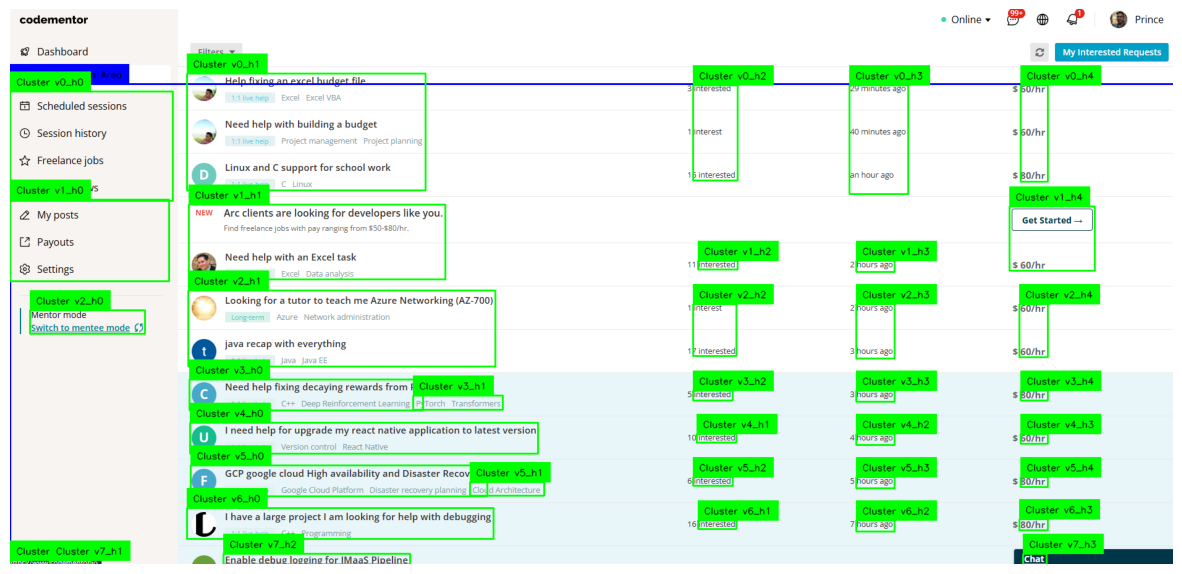

In [37]:
base64_image_str, np_image = cluster_worker.get_visualisation_for_cluster_results()
# display the cluster visualization numpy array
type(base64_image_str)
plot_numpy_image(np_image)

